In [3]:
from vtl.Readfile import Readfile
from spec_id import Analyze_Stack_avgage, Error,Oldest_galaxy, Gen_spec, \
    Combine_1D_parameters, Stack,Median_model, Median_w_Error,Median_w_Error_cont,Likelihood_contours, \
    Gen_sim
from astropy.table import Table
from astropy.io import fits
import astropy.units as u
from astropy.cosmology import Planck13, z_at_value
from scipy.interpolate import interp1d
from scipy.ndimage import interpolation
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import rpy2
import rpy2.robjects as robjects
R = robjects.r
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direction': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
colors = [(0,i,i,i) for i in np.linspace(0,1,3)]
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)

In [4]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]
M,A=np.meshgrid(metal,age)

In [5]:
lzDB = galDB.query('hi_res_specz < 1.16')
mzDB = galDB.query('1.16 < hi_res_specz < 1.3')
mzDB = mzDB.query('ids != 14713 and ids != 38126')
hzDB = galDB.query('1.3 < hi_res_specz < 1.45')
uhzDB = galDB.query('1.45 < hi_res_specz')

In [6]:
###DATA 
uvjDB = pd.read_pickle('../data/uvj_db.pkl')
uvjSDB = uvjDB[uvjDB['IN_SAMP'] == True]
uvjSDB = uvjSDB.query('ra != 189.236333 and ra != 189.284502')

In [31]:
# uvjSDB[lzDB['gids'][lzDB.index[0]]]
UV = uvjSDB['(U-V)'][lzDB['gids'][lzDB.index]]
VJ = uvjSDB['(V-J)'][lzDB['gids'][lzDB.index]]

In [38]:
AGE = lzDB['tx_lwa'].values

In [51]:
AGES = [12.,2.,5.,1.,3.,4.,9.,7.,11.,8.,6.,10.]

In [53]:
for i in range(len(UV)):
    print AGES[i]/max(AGES)

1.0
0.166666666667
0.416666666667
0.0833333333333
0.25
0.333333333333
0.75
0.583333333333
0.916666666667
0.666666666667
0.5
0.833333333333


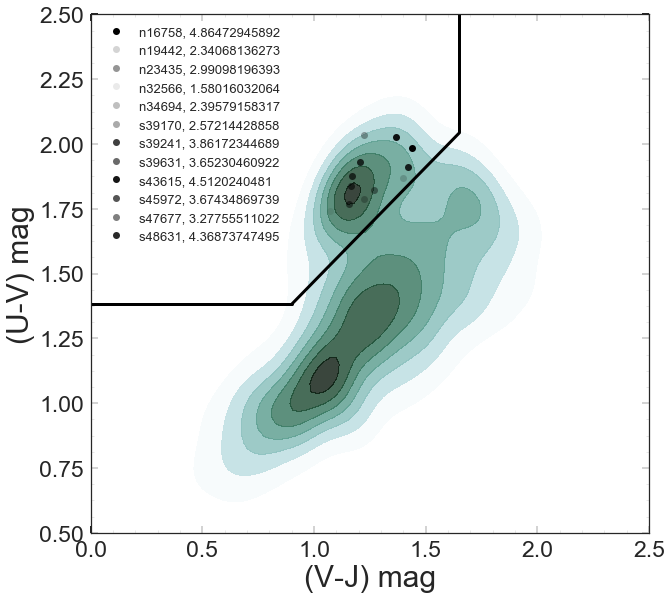

In [64]:
%matplotlib inline

plt.figure(figsize=[10,10])
sea.kdeplot(uvjDB['(V-J)'],uvjDB['(U-V)'],n_levels = 7,alpha = .8,shade=True,cmap=cmap,kernel= 'epa',zorder=1)
for i in range(len(UV)):
    plt.plot(VJ[i],UV[i],'o',color = [0,0,0,AGES[i]/max(AGES)], label = '%s, %s' % (lzDB['gids'][lzDB.index[i]],lzDB['tx_lwa'][lzDB.index[i]]))
plt.plot([0,.9],[1.382,1.382],'k',lw=.9,linewidth=3)
plt.plot([1.65,1.65],[2.045,2.5],'k',lw=.9,linewidth=3)
plt.plot([.9,1.65],[0.88*.9+0.59,0.88*1.65+0.59],'k',lw=.9,linewidth=3)
plt.axis([0,2.5,.5,2.5])
plt.legend(fontsize=13)
plt.xlabel('(V-J) mag',fontsize=30)
plt.ylabel('(U-V) mag',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=23,length = 7, width=2)
plt.minorticks_on()
plt.gcf().subplots_adjust(bottom=0.16)
plt.show()
# plt.savefig('../plots/uvj_kde_plot_8-27.pdf')
plt.close()